<a href="https://colab.research.google.com/github/Swathi1309/ED18B034_ME18B133_CS6910/blob/main/Assignment2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv1D,Conv2D, BatchNormalization, Dropout, Activation, Softmax, MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam, RMSprop

import numpy as np
import pandas as pd
import os
import random
import pprint

from  matplotlib import pyplot as plt
%matplotlib inline


In [26]:
from google.colab import drive
drive.mount('/content/drive')

classes = ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia']

Mounted at /content/drive


In [ ]:
!pip install wandb
!wandb login
import wandb
from wandb.keras import WandbCallback
wandb.init(project="CS6910-assg2", entity="swathi")

In [27]:
def load_data(dir_train, dir_test, batch):
  
  seed = 42
  
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    samplewise_center = 0,
    horizontal_flip = True,
    rotation_range = 30,
    validation_split = 0.1)
  
  val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    samplewise_center = 0,
    validation_split = 0.1)
  
  test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    samplewise_center = 0)
  
  train_aug_dataset = train_datagen.flow_from_directory(
    dir_train,
    target_size = (img_dim,img_dim),
    batch_size = batch,
    classes = ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia'],
    class_mode='categorical',
    subset = 'training',
    seed = seed)

  train_dataset = val_datagen.flow_from_directory(
    dir_train,
    target_size = (img_dim,img_dim),
    batch_size = batch,
    classes = ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia'],
    class_mode='categorical',
    subset = 'training',
    seed = seed)
  
  val_dataset = val_datagen.flow_from_directory(
    dir_train,
    target_size = (img_dim,img_dim),
    batch_size = batch,
    classes = ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia'],
    class_mode='categorical',
    subset = 'validation',
    seed = seed)
  
  test_dataset = test_datagen.flow_from_directory(
    dir_test,
    target_size = (img_dim,img_dim),
    batch_size = batch,
    classes = ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia'],
    class_mode='categorical',
    subset = None,
    seed = seed
  )
  
  return train_aug_dataset, train_dataset, val_dataset, test_dataset

In [6]:
def CNN_wo_BN(filter_matrix, kernel_matrix, activation_matrix, fdropout, dense_no, learning_rate):

  # Input layer
  X_input = keras.Input(shape=(img_dim,img_dim,channel_no))

  # Layer 1
  X = Conv2D(filter_matrix[0], kernel_matrix[0])(X_input)
  X = Activation(activation_matrix[0])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 2
  X = Conv2D(filter_matrix[1], kernel_matrix[1])(X)
  X = Activation(activation_matrix[1])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 3
  X = Conv2D(filter_matrix[2], kernel_matrix[2])(X)
  X = Activation(activation_matrix[2])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 4
  X = Conv2D(filter_matrix[3], kernel_matrix[3])(X)
  X = Activation(activation_matrix[3])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 5
  X = Conv2D(filter_matrix[4], kernel_matrix[4])(X)
  X = Activation(activation_matrix[4])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  X = Flatten()(X)
  X = Dense(dense_no,activation=activation_matrix[5])(X)
  X = Dropout(fdropout)(X)
  X = Dense(10,activation='softmax')(X)
  
  model=Model(inputs=X_input,outputs=X)
  model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy',  metrics=['accuracy'])

  return model

In [5]:
def CNN_w_BN(filter_matrix, kernel_matrix, activation_matrix, fdropout, dense_no, learning_rate):

  # Input layer
  X_input = keras.Input(shape=(img_dim,img_dim,channel_no))

  # Layer 1
  X = Conv2D(filter_matrix[0], kernel_matrix[0])(X_input)
  X = BatchNormalization()(X)
  X = Activation(activation_matrix[0])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 2
  X = Conv2D(filter_matrix[1], kernel_matrix[1])(X)
  X = BatchNormalization()(X)
  X = Activation(activation_matrix[1])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 3
  X = Conv2D(filter_matrix[2], kernel_matrix[2])(X)
  X = BatchNormalization()(X)
  X = Activation(activation_matrix[2])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 4
  X = Conv2D(filter_matrix[3], kernel_matrix[3])(X)
  X = BatchNormalization()(X)
  X = Activation(activation_matrix[3])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 5
  X = Conv2D(filter_matrix[4], kernel_matrix[4])(X)
  X = BatchNormalization()(X)
  X = Activation(activation_matrix[4])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  X = Flatten()(X)
  X = Dense(dense_no,activation=activation_matrix[5])(X)
  X = Dropout(fdropout)(X)
  X = Dense(10,activation='softmax')(X)
  
  model=Model(inputs=X_input,outputs=X)
  model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy',  metrics=['accuracy'])

  return model

In [ ]:
def model_choose(filter_matrix, kernel_matrix, activation_matrix, dropout, dense_no, batch_norm, learning_rate):
  wandb.log({"Filters": filter_matrix})
  if batch_norm == True:
    model = CNN_w_BN(filter_matrix, kernel_matrix, activation_matrix, dropout, dense_no, learning_rate)
  else:
    model = CNN_wo_BN(filter_matrix, kernel_matrix, activation_matrix, dropout, dense_no, learning_rate)
  
  return model

In [7]:
model = CNN_wo_BN(filters[3], kernels[0], activations[0], 0.5, 512, 0.001)

In [28]:
global img_dim
img_dim = 200

global channel_no
channel_no = 3 #3 for RGB images, 1 for greyscale

global batch
batch = 128

global filters
filters = [[64,128,256,512,512],[64,128,256,256,512],[128,256,256,512,512],[96,128,256,512,512]]

global kernels
kernels = [[(3,3)]*5, [(5,5)]*5]

global activations
activations = [['relu']*6]

global F, K, A

global train_aug_dataset, train_dataset, val_dataset, test_datagen
train_aug_dataset, train_dataset, val_dataset, test_dataset = load_data('/content/drive/MyDrive/inaturalist_12K/train', '/content/drive/MyDrive/inaturalist_12K/val', batch)

Found 9018 images belonging to 10 classes.
Found 9018 images belonging to 10 classes.
Found 1001 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [29]:
(x,y) = test_dataset.next()

In [30]:
x_backprop = np.expand_dims(x[0],axis=0)

In [13]:
X_input = np.random.random((1, 200, 200, 3))*255

In [65]:
@tf.custom_gradient
def GBRelu(x):
  def gradient(dy):
    grad = tf.cast(dy>0,"float32")*tf.cast(x>0, "float32")*dy
    return  grad
  return tf.nn.relu(x), gradient
# Here model is the best model
GBModel = Model(inputs = [model.inputs],outputs = [model.get_layer(index=13).output]) # Here the index is to be checked
layer_dict = [layer for layer in GBModel.layers[1:] if hasattr(layer,'activation')]
for layer in layer_dict:
  if layer.activation == tf.keras.activations.relu:
    layer.activation = GBRelu


In [68]:
grad_list=[]
for i in range(0,10):
  with tf.GradientTape(persistent=True) as tape:
    inputs = tf.Variable(tf.cast(x_backprop, tf.float32))
    outputs = GBModel(inputs)
    new = np.zeros((1,8,8,512))
    rand = np.random.randint(0,511)
    new[:,:,:,256] = np.ones((1,8,8))
    outputs = outputs*new
    # out_list.append(outputs)
  grads = tape.gradient(outputs,inputs)[0]
  grad_list.append(grads)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

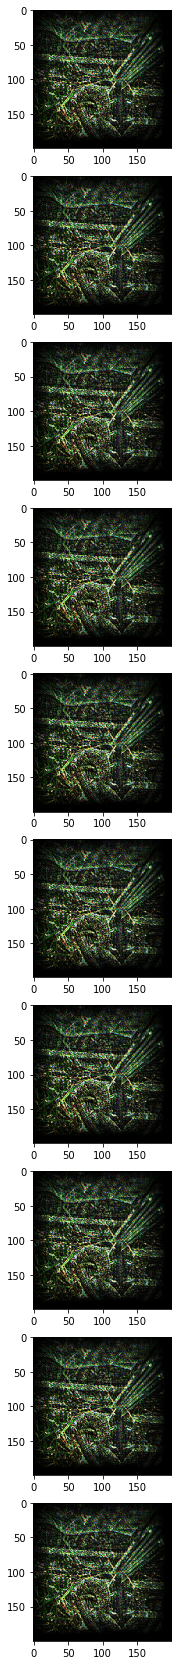

In [69]:
fig, a = plt.subplots(10, 1, figsize=(30,30))
for i in range(0,10):
  a[i].imshow(np.array(grad_list[i])*255)
plt.show()

In [ ]:
sweep_config = {
    'method': 'grid'
    }

parameters_dict = {
    'filter_matrix':{
        'values': [3]
      },
    'kernel_matrix': {
        'values': [1]
      },
    'activation_matrix': {
        'values': [0]
      },
    'learn_rate': {
        'values': [1e-3]
      },
    'epochs': {
        'values': [40]
      },
    'dropout': {
        'values': [0.2]
      },
    'batch_normalization': {
        'values': [True]
      },
    'dense_number': {
          'values': [512]
      },
    'augmentation':{
        'values' : [True]
      }
}
sweep_config['parameters'] = parameters_dict
pprint.pprint(sweep_config)

def training_sweep(config=None):
    with wandb.init(config=config):
        config = wandb.config

        F = filters[config.filter_matrix]
        K = kernels[config.kernel_matrix]
        A = activations[config.activation_matrix]

        model = model_choose(F, K, A, config.dropout, config.dense_number, config.batch_normalization, config.learn_rate)
        if config.augmentation == True:
          train = train_aug_dataset
        else:
          train = train_dataset

        history = model.fit(train, 
                            epochs=config.epochs,
                            validation_data = val_dataset,
                            callbacks = [WandbCallback(data_type='image', labels = classes)]
                            )
        # wandb.log(history.history)

In [ ]:
sweep_id = wandb.sweep(sweep_config, project="CS6910-assg2")
wandb.agent(sweep_id, training_sweep)